In [30]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report, roc_curve, auc
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [31]:
#read the dataset
df = pd.read_csv('/Users/72xs/Desktop/dsi/Heart-Failure-Prediction/models/heart.csv')

In [32]:
# check the first few lines of data
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [33]:
# check if any missing value
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [34]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [ ]:
#select features and target variable
X = df.drop(columns=["HeartDisease"]) 
y = df["HeartDisease"] 

In [36]:
#check the data type of x variable
print(X.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object


In [37]:
#change the data to numbers
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le 


In [38]:
#Data standardization
#KNN is sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
# choose K Value and train KNN model
k = 5  
knn = KNeighborsClassifier(n_neighbors=k) 
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [43]:
#Make predictions and compute evaluation metrics
y_pred = knn.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred) 
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 

In [ ]:
#print all the evaluation numbers
print(f"KNN Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")  
print(f"F1-score: {f1:.2f}") 
print(f"AUC-ROC: {roc_auc:.2f}")
print(f"RMS Error: {rmse:.2f}")

#Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

KNN Model Accuracy: 0.89
Precision: 0.89
Recall: 0.91
F1-score: 0.90
AUC-ROC: 0.92
RMS Error: 0.33

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [42]:
# calculate feature importance
perm_importance = permutation_importance(knn, X_test, y_test, scoring='accuracy')
feature_importance = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': perm_importance.importances_mean})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False) 

#show feature importance
print("\nFeature Importance:")
print(feature_importance) 



Feature Importance:
           Feature  Importance
10        ST_Slope    0.084783
5        FastingBS    0.046739
8   ExerciseAngina    0.046739
4      Cholesterol    0.046739
1              Sex    0.036957
9          Oldpeak    0.031522
0              Age    0.025000
6       RestingECG    0.020652
2    ChestPainType    0.018478
3        RestingBP    0.006522
7            MaxHR    0.004348


In [44]:
#Hyperparameter Tuning for KNN
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 31, 2)),  # Odd values for K to avoid ties
    'weights': ['uniform', 'distance'],  # Weighting strategies
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model
best_knn = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy with Best KNN: {accuracy:.2f}")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Accuracy: 0.8650917901407137
Test Set Accuracy with Best KNN: 0.92


In [45]:
#Evaluate the KNN performance of the model using the tuned hyperparameters.
# Use the best KNN model found during hyperparameter tuning
y_pred = best_knn.predict(X_test)  
y_prob = best_knn.predict_proba(X_test)[:, 1]  # Get probability scores for ROC-AUC

# Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print Performance Metrics
print(f"🔹 **KNN Model Performance (Tuned Hyperparameters)** 🔹")
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall: {recall:.2f}")
print(f"✅ F1-score: {f1:.2f}")
print(f"✅ AUC-ROC: {roc_auc:.2f}")

# Print Classification Report
print("\n🔹 **Classification Report:**")
print(classification_report(y_test, y_pred))

🔹 **KNN Model Performance (Tuned Hyperparameters)** 🔹
✅ Accuracy: 0.92
✅ Precision: 0.93
✅ Recall: 0.92
✅ F1-score: 0.93
✅ AUC-ROC: 0.94

🔹 **Classification Report:**
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        82
           1       0.93      0.92      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [47]:
# calculate feature importance
perm_importance = permutation_importance(best_knn, X_test, y_test, scoring='accuracy')
feature_importance = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': perm_importance.importances_mean})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False) 

#show feature importance
print("\nFeature Importance:")
print(feature_importance) 


Feature Importance:
           Feature  Importance
10        ST_Slope    0.092391
2    ChestPainType    0.056522
4      Cholesterol    0.047826
8   ExerciseAngina    0.036957
9          Oldpeak    0.031522
5        FastingBS    0.026087
1              Sex    0.023913
6       RestingECG    0.023913
3        RestingBP    0.018478
7            MaxHR    0.016304
0              Age    0.011957


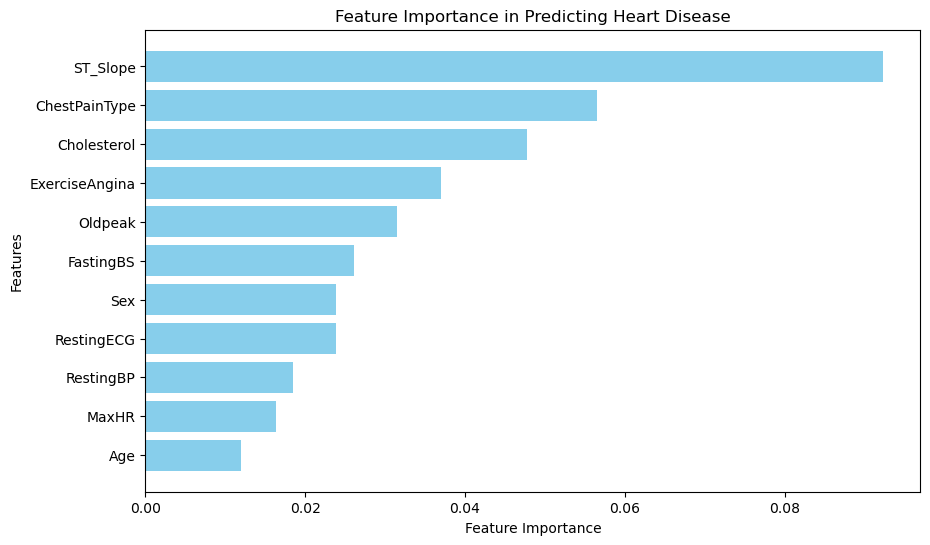

In [66]:
# plot feature importance bar chart with best KNN
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Heart Disease")
plt.gca().invert_yaxis() 
plt.savefig("knn_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

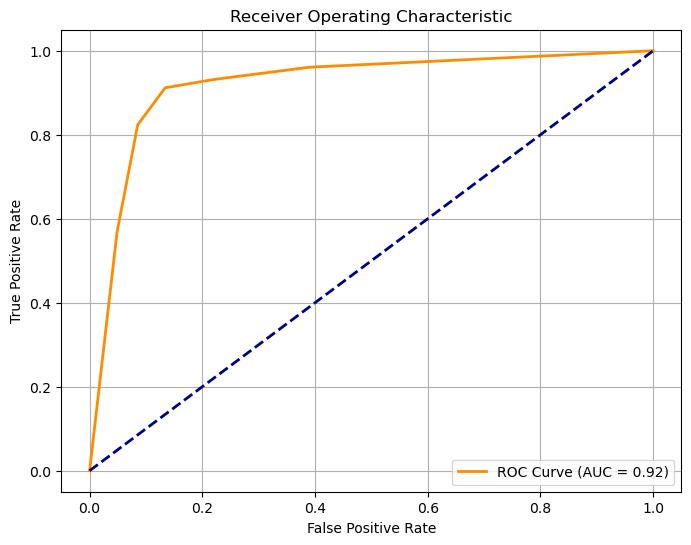

In [65]:
#visualize the ROC Curve

# Get the predicted probabilities for the positive class (HeartDisease = 1)
y_probs = knn.predict_proba(X_test)[:, 1]  

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("knn_ROC.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 600x500 with 0 Axes>

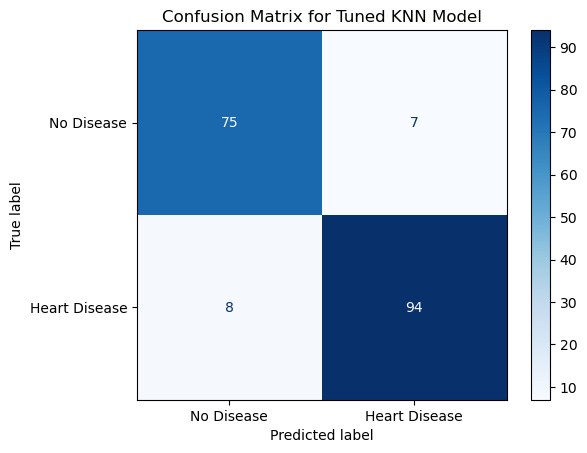

In [64]:
##Visualize correct vs. incorrect predictions (Confusion Matrix).

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Heart Disease"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Tuned KNN Model")
plt.savefig("knn_Confusion Matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [61]:
#Sve the Model
import pickle

# Define save path
save_path = "/Users/72xs/Desktop/dsi/Heart-Failure-Prediction/models/KNN/"

# Save the trained KNN model
with open(save_path + 'heart_disease_knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)


print("✅ Best-performing KNN model saved as 'heart_disease_knn_model.pkl'")



✅ Best-performing KNN model saved as 'heart_disease_knn_model.pkl'


In [67]:
# Create dummy data 
dummy_data = pd.DataFrame({
    'Age': [54],
    'Sex': label_encoders['Sex'].transform(['M']),  # Encode categorical variables
    'ChestPainType': label_encoders['ChestPainType'].transform(['ATA']),
    'RestingBP': [130],
    'Cholesterol': [223],
    'FastingBS': [0],
    'RestingECG': label_encoders['RestingECG'].transform(['Normal']),
    'MaxHR': [138],
    'ExerciseAngina': label_encoders['ExerciseAngina'].transform(['N']),
    'Oldpeak': [0.6],
    'ST_Slope': label_encoders['ST_Slope'].transform(['Flat'])
})

# Standardize the dummy data
dummy_data_scaled = scaler.transform(dummy_data)

# Predict with the trained model
dummy_prediction = knn.predict(dummy_data_scaled)
dummy_prob = knn.predict_proba(dummy_data_scaled)

# Output results
print(f"Predicted class: {dummy_prediction[0]}")  # 0 or 1
print(f"Probability of heart disease: {dummy_prob[0][1]:.2f}")  


Predicted class: 0
Probability of heart disease: 0.40


In the case of dummy_data, the model will output either 1 (indicating the presence of heart disease) or 0 (indicating no heart disease).
The individual is a 54-year-old male with certain risk factors such as chest pain type (ATA), resting blood pressure (130), cholesterol level (223), and exercise-induced angina (no). The features provided may not point to an elevated risk of heart disease, which could be due to factors like normal resting ECG, low FastingBS, and normal MaxHR.
